In [3]:
!pip install numpy pandas matplotlib seaborn 

In [77]:
import pandas as pd

In [78]:
df = pd.read_csv('spam.csv',encoding = 'ISO-8859-1')

In [79]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [80]:
df.shape

(5572, 5)

In [81]:
# 1. data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model Building
# 5. Evaluation

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [83]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [84]:
df.head(2)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


In [85]:
df.rename(columns={'v1':'target' , 'v2':'text'} , inplace=True)
df.sample(5)

,target,text
1363,ham,"Yetunde, i'm sorry but moji and i seem too bus..."
1183,ham,Am i that much bad to avoid like this?
4952,ham,I lost 4 pounds since my doc visit last week w...
2952,spam,"URGENT! Your mobile was awarded a å£1,500 Bonu..."
568,ham,Love it! Daddy will make you scream with pleas...


In [86]:
!pip install scikit-learn

In [87]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [88]:
df['target'] = encoder.fit_transform(df['target'])

In [89]:
df.head(5)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [90]:
## remove the missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [91]:
## check for duplicates
df.duplicated().sum()

np.int64(403)

In [92]:
df = df.drop_duplicates(keep = 'first')

In [93]:
df.shape

(5169, 2)

In [94]:
## Exploratory data analysis

In [95]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

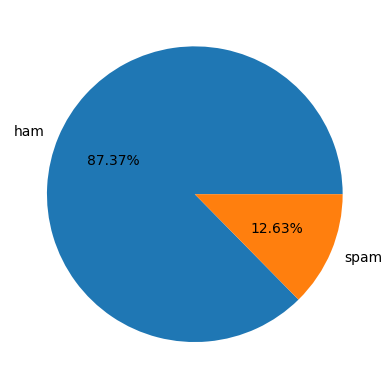

In [96]:
import matplotlib.pyplot as plt 
plt.pie(df['target'].value_counts() , labels = ['ham','spam'],autopct = '%0.2f%%')
plt.show()

In [97]:
 !pip install nltk

In [98]:
import nltk

In [99]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\om\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [100]:
df.columns

Index(['target', 'text'], dtype='object')

In [101]:
df['num_characters'] = df['text'].apply(len)

C:\Users\om\AppData\Local\Temp\ipykernel_16340\253964734.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df['text'].apply(len)


In [102]:
df

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [105]:
df['num_words'] = df['text'].apply(lambda x :len(nltk.word_tokenize(x)))

C:\Users\om\AppData\Local\Temp\ipykernel_16340\3480574913.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['text'].apply(lambda x :len(nltk.word_tokenize(x)))


In [106]:
df.head(5)

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [107]:
## no of senstences
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\om\AppData\Local\Temp\ipykernel_16340\2074007370.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [108]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [109]:
df.columns

Index(['target', 'text', 'num_characters', 'num_words', 'num_sentences'], dtype='object')

In [110]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
## Tha ham messages only => Target == 0 means HAM 
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


<Axes: xlabel='num_characters', ylabel='Count'>

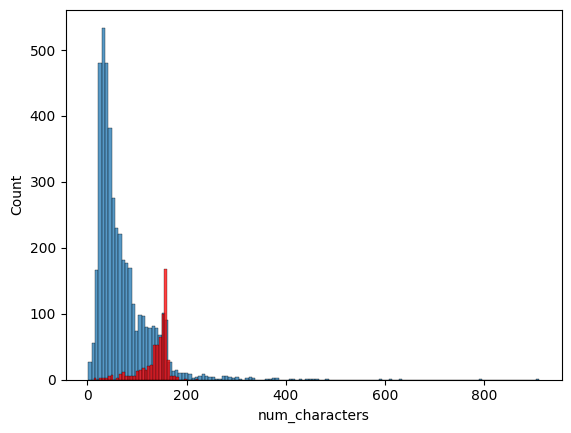

In [112]:
# Data visualization Module
import seaborn as sns
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'] , color = 'red')

In [113]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


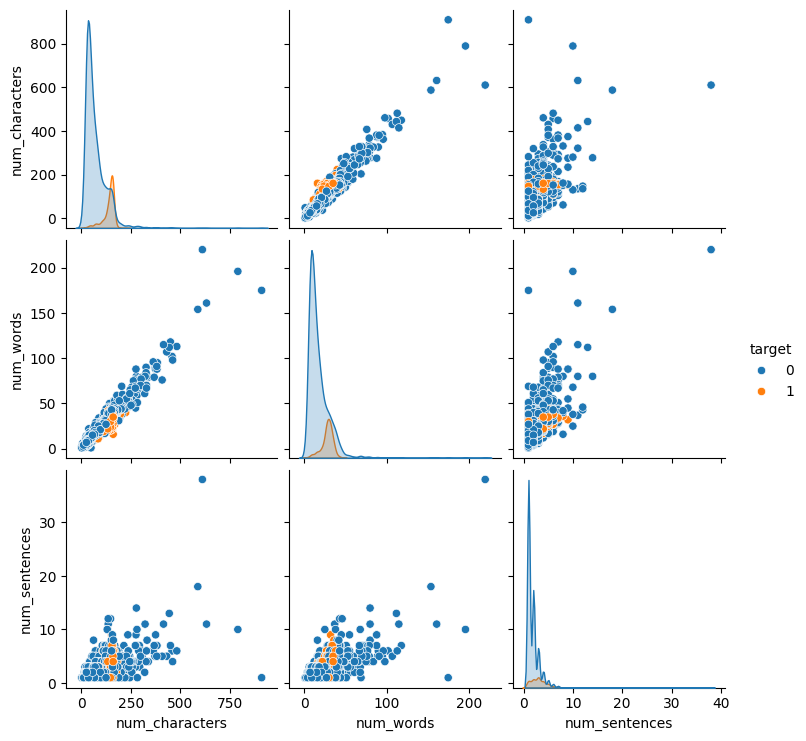

In [114]:
sns.pairplot(df , hue = 'target')

<Axes: >

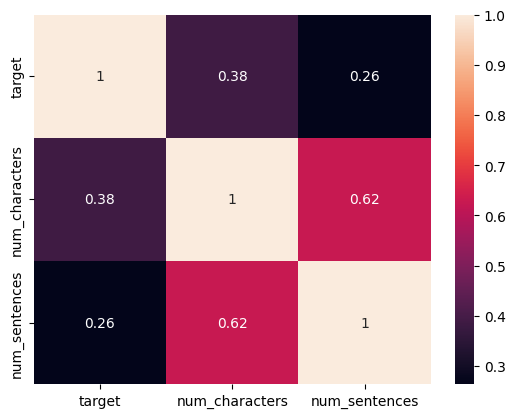

In [115]:
sns.heatmap(df[['target','num_characters' , 'num_sentences']].corr(),annot=True)

data preprocessing

In [116]:
# lower case
# tokenize
# remove special character like ,. | $,&
# stopwards removal
# punctution
# stemming

In [119]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\om\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [118]:
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [120]:
stopwords.words('english')
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [121]:
import string

transforms (text) ------> apply above method  -----------> clean data 

In [124]:
def transform_text(text):
    text = text.lower() ## lowercasing
    text = nltk.word_tokenize(text) # tokenize

    y = []

    for i in text:
        if i.isalnum(): ## if the character is alphanumeric character (a-z,1-9) only these char not any symbol
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:  # stopwords removal and punct removal
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()


    for i in text: # stemming
        y.append(ps.stem(i))

    return " ".join(y)

In [125]:
transform_text("I am goonna be home soon don't want to talk to anyone . ")

'goonna home soon want talk anyon'

In [126]:
df['transform_text'] = df['text'].apply(transform_text)

C:\Users\om\AppData\Local\Temp\ipykernel_16340\360176214.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transform_text'] = df['text'].apply(transform_text)


In [128]:
 !pip install wordcloud

In [136]:
import wordcloud

In [138]:
from wordcloud import WordCloud

In [139]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [140]:
wc

In [142]:
spam_wc = wc.generate(df[df['target'] == 1]['transform_text'].str.cat(sep=" "))

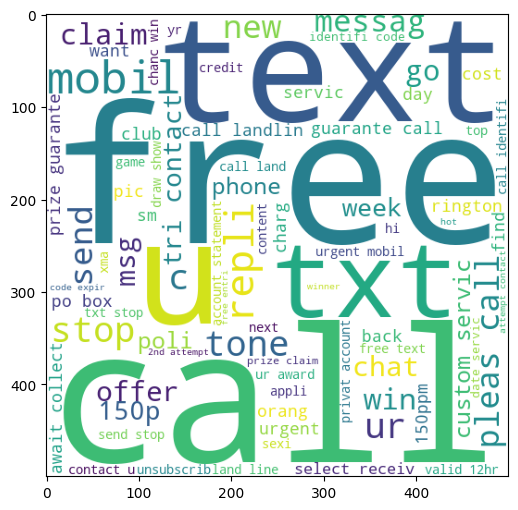

In [143]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [144]:
ham_wc = wc.generate(df[df['target'] == 0]['transform_text'].str.cat(sep=" "))

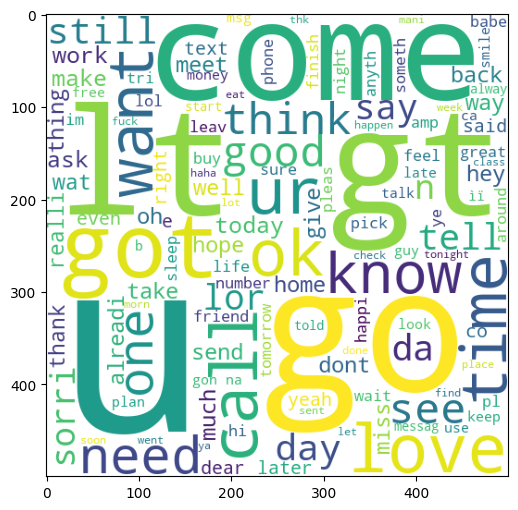

In [145]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [147]:
spam_corpus = []
for msg in df[df['target'] == 1]['transform_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [148]:
len(spam_corpus)

9939

In [150]:
from collections import Counter

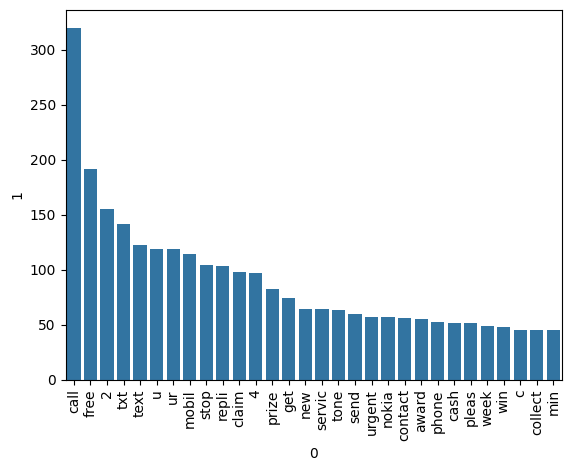

In [151]:
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0], y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
ham_corpus = []
for msg in df[df['target'] == 0]['transform_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
        

In [154]:
len(ham_corpus)

35404

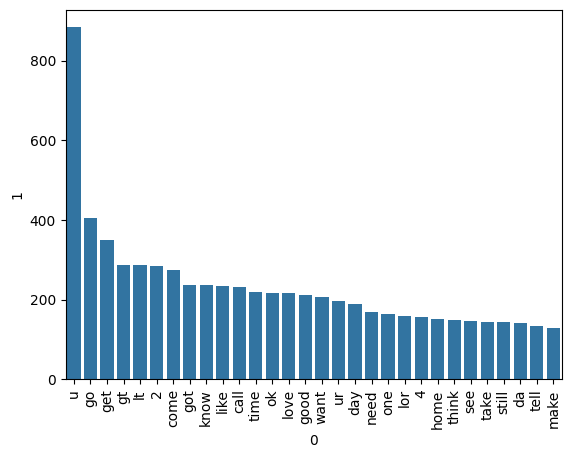

In [155]:
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0], y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [156]:
df.head()

,target,text,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [157]:
#####text vectorization
######using bag of words

## Model Building

In [161]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)
 

In [163]:
X=tfidf.fit_transform(df['transform_text']).toarray()

In [164]:
# from sklearn.preprocessing import MinMaxScaler
# scaler=MinMaxScaler()
# X=scaler.fit_transform(X)

In [165]:
X.shape

(5169, 3000)

In [166]:
y=df['target'].values

In [167]:
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

In [168]:
from sklearn.model_selection import train_test_split

In [169]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [170]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [171]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [172]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))
#very bad output obtained

0.874274661508704
[[790 106]
 [ 24 114]]
0.5181818181818182


In [173]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))
# still better

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [174]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))
# good


0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [175]:
# due to imbalance data we prefer accuracy 
# tfidf,mnb used


In [176]:
import pickle

In [177]:
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))